# Part 1 - Dataset

Getting Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/data_endek/

/content/drive/MyDrive/data_endek


#Importing Library

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
%cd train/

/content/drive/MyDrive/data_endek/train


In [ ]:
import os

directories = os.listdir()

filename=[]
label=[]

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files=os.listdir()
  for j in range(0, len(files)):
    files[j]=directories[i]+'/'+files[j]
    label.append(directories[i])
    print(files[j])
  filename=filename + files
  os.chdir("..")
  print(filename)
  print(label)

/content/drive/MyDrive/data_endek/train/flora
flora/flora (150).jpg
flora/flora (149).jpg
flora/flora (148).jpg
flora/flora (147).jpg
flora/flora (146).jpg
flora/flora (145).jpg
flora/flora (144).jpg
flora/flora (143).jpg
flora/flora (142).jpg
flora/flora (141).jpg
flora/flora (140).jpg
flora/flora (139).jpg
flora/flora (138).jpg
flora/flora (137).jpg
flora/flora (136).jpg
flora/flora (135).jpg
flora/flora (134).jpg
flora/flora (133).jpg
flora/flora (132).jpg
flora/flora (131).jpg
flora/flora (130).jpg
flora/flora (129).jpg
flora/flora (128).jpg
flora/flora (127).jpg
flora/flora (126).jpg
flora/flora (125).jpg
flora/flora (124).jpg
flora/flora (123).jpg
flora/flora (122).jpg
flora/flora (121).jpg
flora/flora (120).jpg
flora/flora (119).jpg
flora/flora (118).jpg
flora/flora (117).jpg
flora/flora (116).jpg
flora/flora (115).jpg
flora/flora (114).jpg
flora/flora (113).jpg
flora/flora (112).jpg
flora/flora (111).jpg
flora/flora (110).jpg
flora/flora (109).jpg
flora/flora (108).jpg
flora/fl

Count image files

In [ ]:
print(len(filename))

fauna/fauna (350).jpg
fauna/fauna (355).jpg
fauna/fauna (352).jpg
fauna/fauna (348).jpg
fauna/fauna (353).jpg
fauna/fauna (354).jpg
fauna/fauna (357).jpg
fauna/fauna (351).jpg
fauna/fauna (356).jpg
fauna/fauna (345).jpg
fauna/fauna (338).jpg
fauna/fauna (344).jpg
fauna/fauna (342).jpg
fauna/fauna (339).jpg
fauna/fauna (346).jpg
fauna/fauna (343).jpg
fauna/fauna (341).jpg
fauna/fauna (340).jpg
fauna/fauna (336).jpg
fauna/fauna (335).jpg
fauna/fauna (332).jpg
fauna/fauna (334).jpg
fauna/fauna (337).jpg
fauna/fauna (333).jpg
fauna/fauna (330).jpg
fauna/fauna (327).jpg
fauna/fauna (331).jpg
fauna/fauna (326).jpg
fauna/fauna (328).jpg
fauna/fauna (329).jpg
fauna/fauna (325).jpg
fauna/fauna (316).jpg
fauna/fauna (311).jpg
fauna/fauna (318).jpg
fauna/fauna (323).jpg
fauna/fauna (310).jpg
fauna/fauna (324).jpg
fauna/fauna (312).jpg
fauna/fauna (322).jpg
fauna/fauna (320).jpg
fauna/fauna (313).jpg
fauna/fauna (319).jpg
fauna/fauna (317).jpg
fauna/fauna (309).jpg
fauna/fauna (315).jpg
fauna/faun

Save list of images

In [ ]:
import pandas as pd

data = {"filename": filename,
        "label": label
        }

df = pd.DataFrame(data=data)

Print the list of images file

In [ ]:
print(df)

                   filename  label
0     flora/flora (150).jpg  flora
1     flora/flora (149).jpg  flora
2     flora/flora (148).jpg  flora
3     flora/flora (147).jpg  flora
4     flora/flora (146).jpg  flora
...                     ...    ...
2306    fauna/fauna (6).jpg  fauna
2307  fauna/fauna (761).jpg  fauna
2308  fauna/fauna (760).jpg  fauna
2309  fauna/fauna (762).jpg  fauna
2310  fauna/fauna (759).jpg  fauna

[2311 rows x 2 columns]


Randomize the list of images

In [ ]:
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

                           filename      label
1164  gringsing/gringsing (416).jpg  gringsing
1874          fauna/fauna (433).jpg      fauna
2169          fauna/fauna (146).jpg      fauna
1279  gringsing/gringsing (247).jpg  gringsing
1502   gringsing/gringsing (39).jpg  gringsing
...                             ...        ...
74             flora/flora (43).jpg      flora
1937          fauna/fauna (377).jpg      fauna
500           flora/flora (507).jpg      flora
2275           fauna/fauna (29).jpg      fauna
629           flora/flora (385).jpg      flora

[2311 rows x 2 columns]


Cross Validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

train_data = df_shuffled

Y = train_data[['label']]

#the number of split
kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

Preprocessing the training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/.255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )

Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/.255)

# Part 2 - Building CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, ZeroPadding2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session
from keras.optimizers import Adam
from tensorflow.keras import regularizers

Define the directories of dataset

In [ ]:
image_dir = '/content/drive/My Drive/data_endek/train'

Method for save the best CNN Model

In [ ]:
def get_model_name(k):
  return 'model_'+str(k)+'.h5'

Import and define the performance metric

In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

Build and Train the CNN Model

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  # model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  # model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=10,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
116/116 [==============================] - ETA: 0s - loss: 1.0763 - accuracy: 0.6239
Epoch 1: val_accuracy improved from -inf to 0.72354, saving model to /saved_models/model_1.h5
116/116 [==============================] - 373s 3s/step - loss: 1.0763 - accuracy: 0.6239 - val_loss: 0.5791 - val_accuracy: 0.7235
Epoch 2/10
116/116 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.6775
Epoch 2: val_accuracy did not improve from 0.72354
116/116 [==============================] - 17s 151ms/step - loss: 0.6660 - accuracy: 0.6775 - val_loss: 0.5851 - val_accuracy: 0.6782
Epoch 3/10
116/116 [==============================] - ETA: 0s - loss: 0.5651 - accuracy: 0.7332
Epoch 3: val_accuracy improved from 0.72354 to 0.79914, saving model to /saved_models/model_1.h5
116/116 [=========

VIEW THE PREFORMANCE


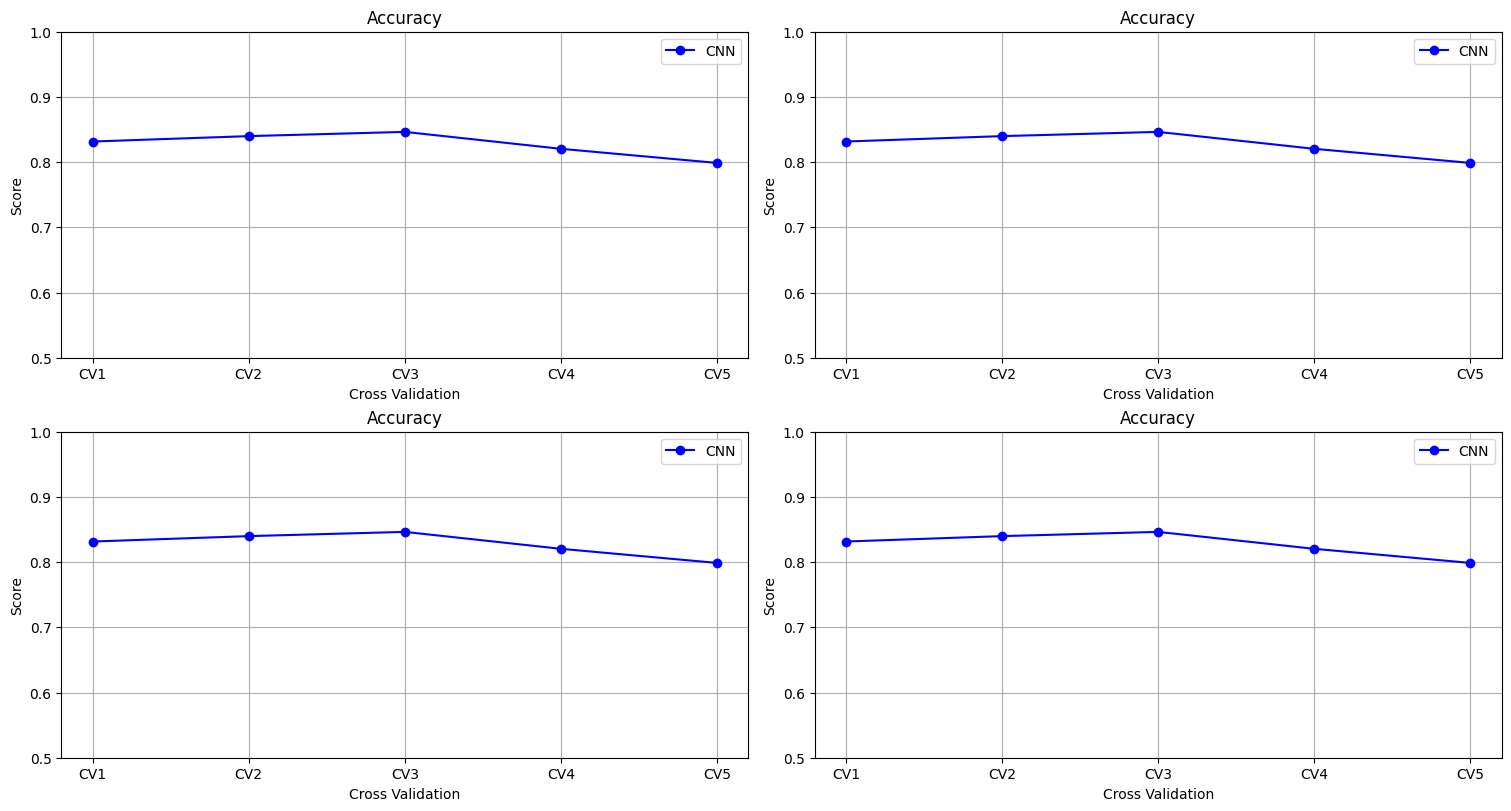

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5,1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,1].set_title('Accuracy')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5,1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,0].set_title('Accuracy')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5,1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,1].set_title('Accuracy')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5,1))
axs[1,1].grid()
axs[1,1].legend()



In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[103  35   4]
 [ 50 118   2]
 [  1   1 148]]


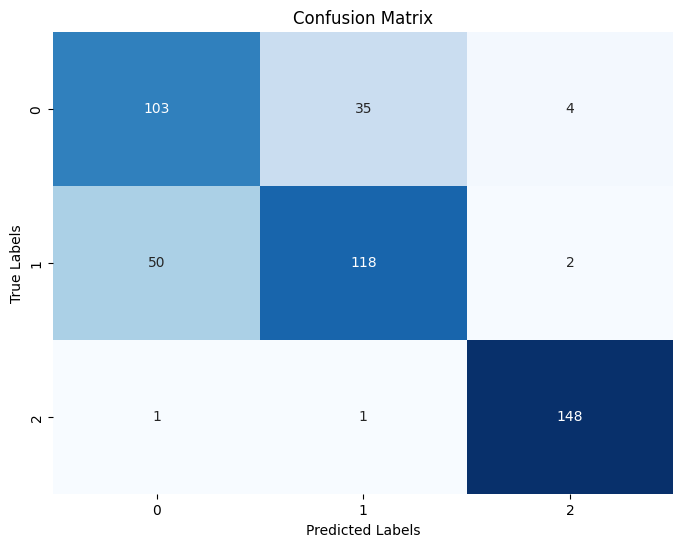

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

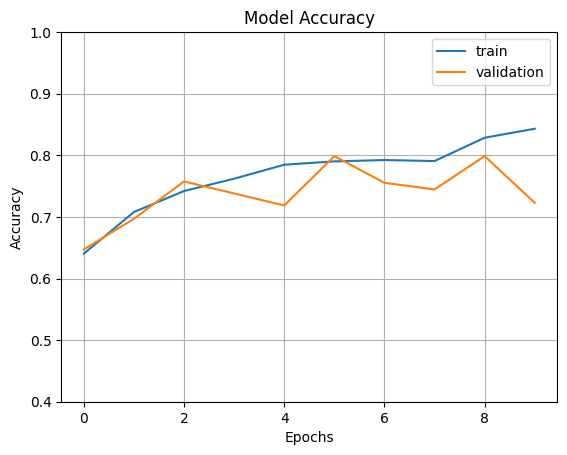

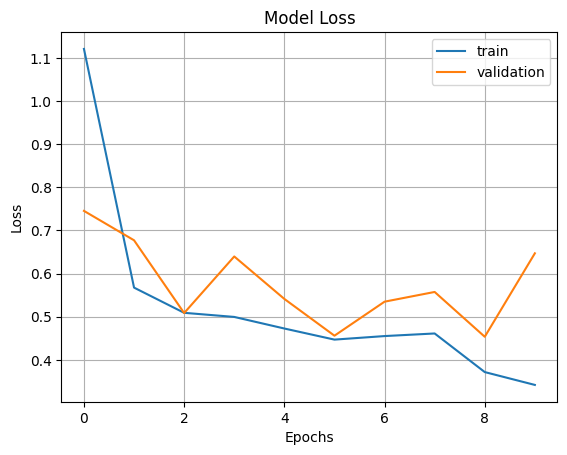

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  # model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  # model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=20,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
Epoch 1/20
116/116 [==============================] - ETA: 0s - loss: 1.3976 - accuracy: 0.5676
Epoch 1: val_accuracy improved from -inf to 0.68467, saving model to /saved_models/model_1.h5
116/116 [==============================] - 21s 160ms/step - loss: 1.3976 - accuracy: 0.5676 - val_loss: 0.6046 - val_accuracy: 0.6847
Epoch 2/20
116/116 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.6613
Epoch 2: val_accuracy did not improve from 0.68467
116/116 [==============================] - 26s 224ms/step - loss: 0.6924 - accuracy: 0.6613 - val_loss: 0.5814 - val_accuracy: 0.6847
Epoch 3/20
116/116 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.7029
Epoch 3: val_accuracy improved from 0.68467 to 0.70194, saving model to /saved_models/model_1.h5
116/116 [==============================] - 22s 188ms/step - loss: 0.5866 - accura

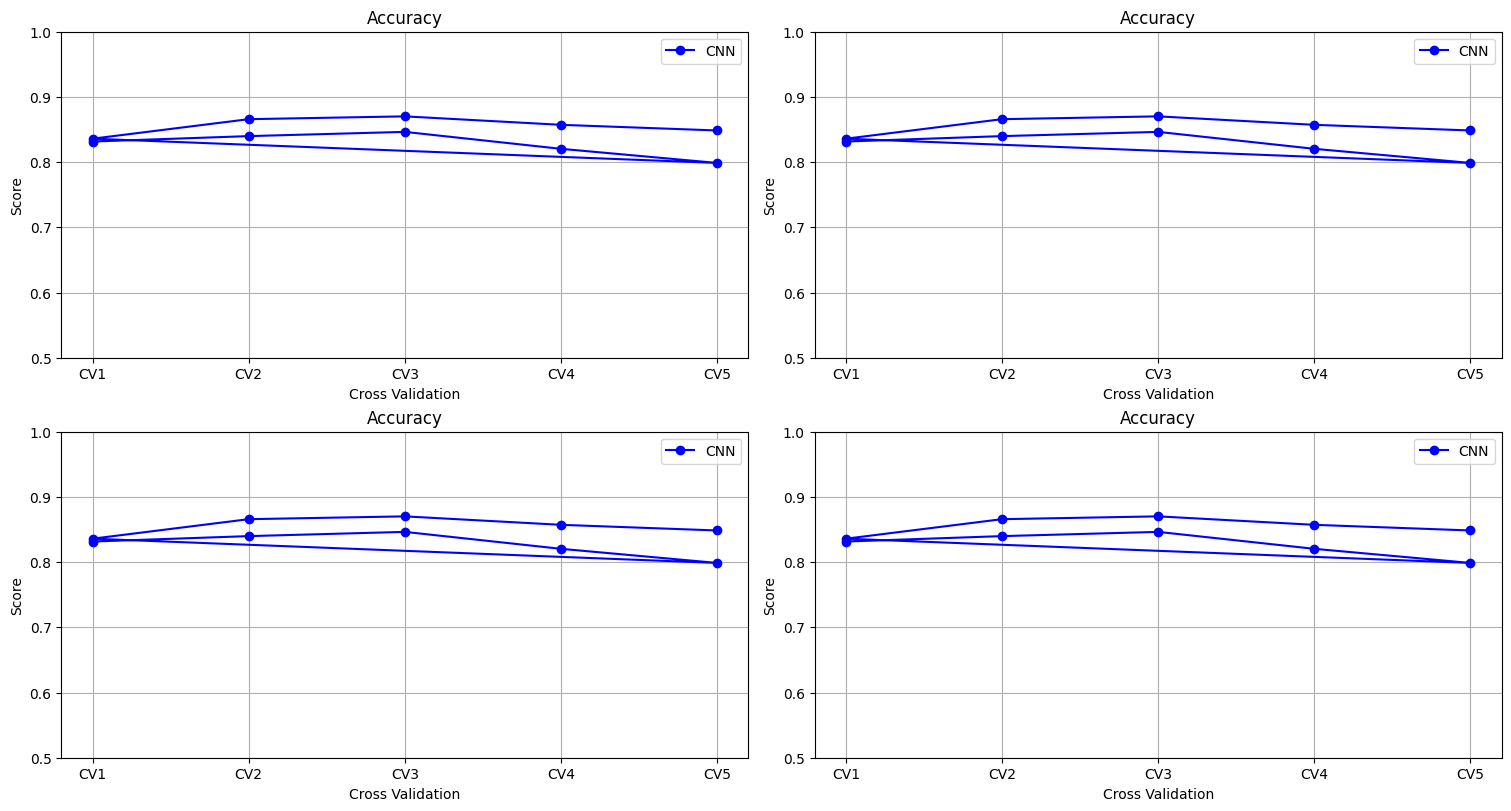

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5,1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,1].set_title('Accuracy')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5,1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,0].set_title('Accuracy')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5,1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,1].set_title('Accuracy')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5,1))
axs[1,1].grid()
axs[1,1].legend()



In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 88  53   1]
 [ 13 155   2]
 [  0   1 149]]


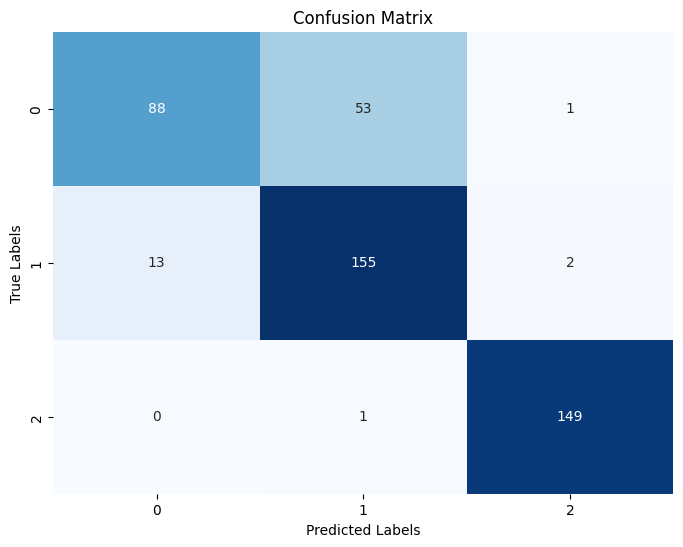

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

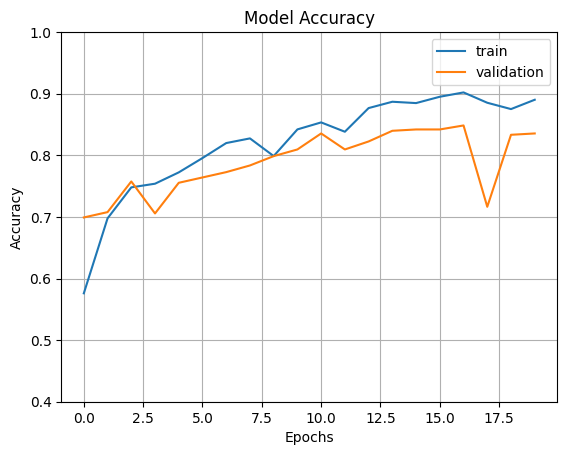

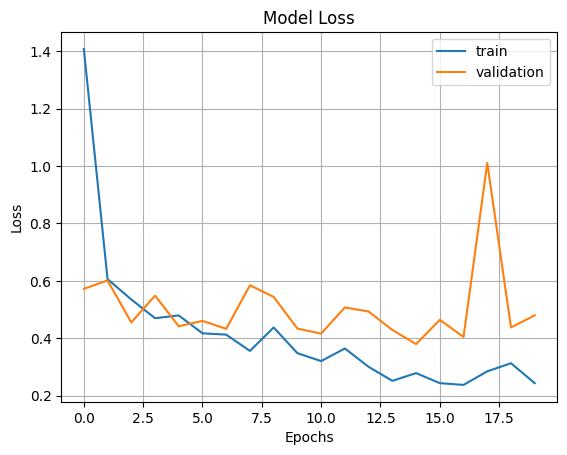

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  # model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  # model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=30,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
Epoch 1/30
116/116 [==============================] - ETA: 0s - loss: 0.9704 - accuracy: 0.6136
Epoch 1: val_accuracy improved from -inf to 0.67387, saving model to /saved_models/model_1.h5
116/116 [==============================] - 22s 166ms/step - loss: 0.9704 - accuracy: 0.6136 - val_loss: 0.6553 - val_accuracy: 0.6739
Epoch 2/30
116/116 [==============================] - ETA: 0s - loss: 0.5961 - accuracy: 0.7094
Epoch 2: val_accuracy improved from 0.67387 to 0.69978, saving model to /saved_models/model_1.h5
116/116 [==============================] - 17s 147ms/step - loss: 0.5961 - accuracy: 0.7094 - val_loss: 0.5730 - val_accuracy: 0.6998
Epoch 3/30
116/116 [==============================] - ETA: 0s - loss: 0.5177 - accuracy: 0.7603
Epoch 3: val_accuracy improved from 0.69978 to 0.74514, saving model to /saved_models/model_1.h5
116/116 [==========================

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5,1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,1].set_title('Accuracy')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5,1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,0].set_title('Accuracy')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5,1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,1].set_title('Accuracy')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5,1))
axs[1,1].grid()
axs[1,1].legend()



In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[111  30   1]
 [ 23 145   2]
 [  0   0 150]]


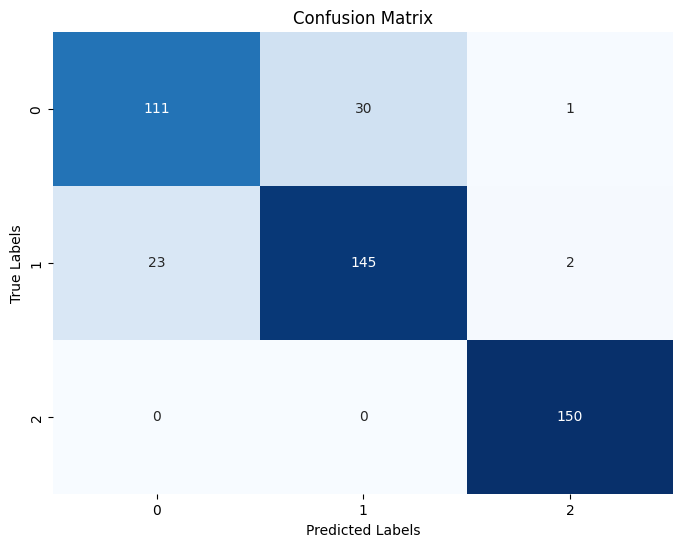

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

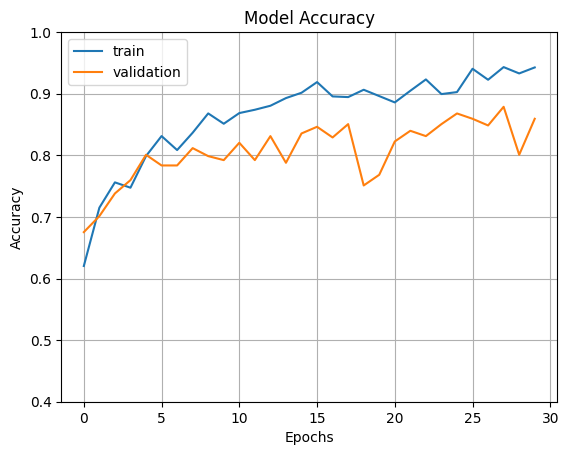

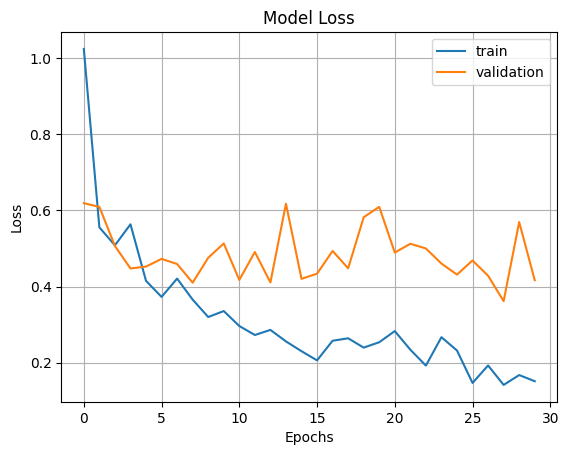

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  # model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  # model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=40,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
Epoch 1/40
116/116 [==============================] - ETA: 0s - loss: 1.1936 - accuracy: 0.6098
Epoch 1: val_accuracy improved from -inf to 0.72570, saving model to /saved_models/model_1.h5
116/116 [==============================] - 22s 164ms/step - loss: 1.1936 - accuracy: 0.6098 - val_loss: 0.5995 - val_accuracy: 0.7257
Epoch 2/40
116/116 [==============================] - ETA: 0s - loss: 0.5315 - accuracy: 0.7435
Epoch 2: val_accuracy improved from 0.72570 to 0.76674, saving model to /saved_models/model_1.h5
116/116 [==============================] - 17s 148ms/step - loss: 0.5315 - accuracy: 0.7435 - val_loss: 0.5164 - val_accuracy: 0.7667
Epoch 3/40
116/116 [==============================] - ETA: 0s - loss: 0.5263 - accuracy: 0.7246
Epoch 3: val_accuracy did not improve from 0.76674
116/116 [==============================] - 17s 143ms/step - loss: 0.5263 - accura

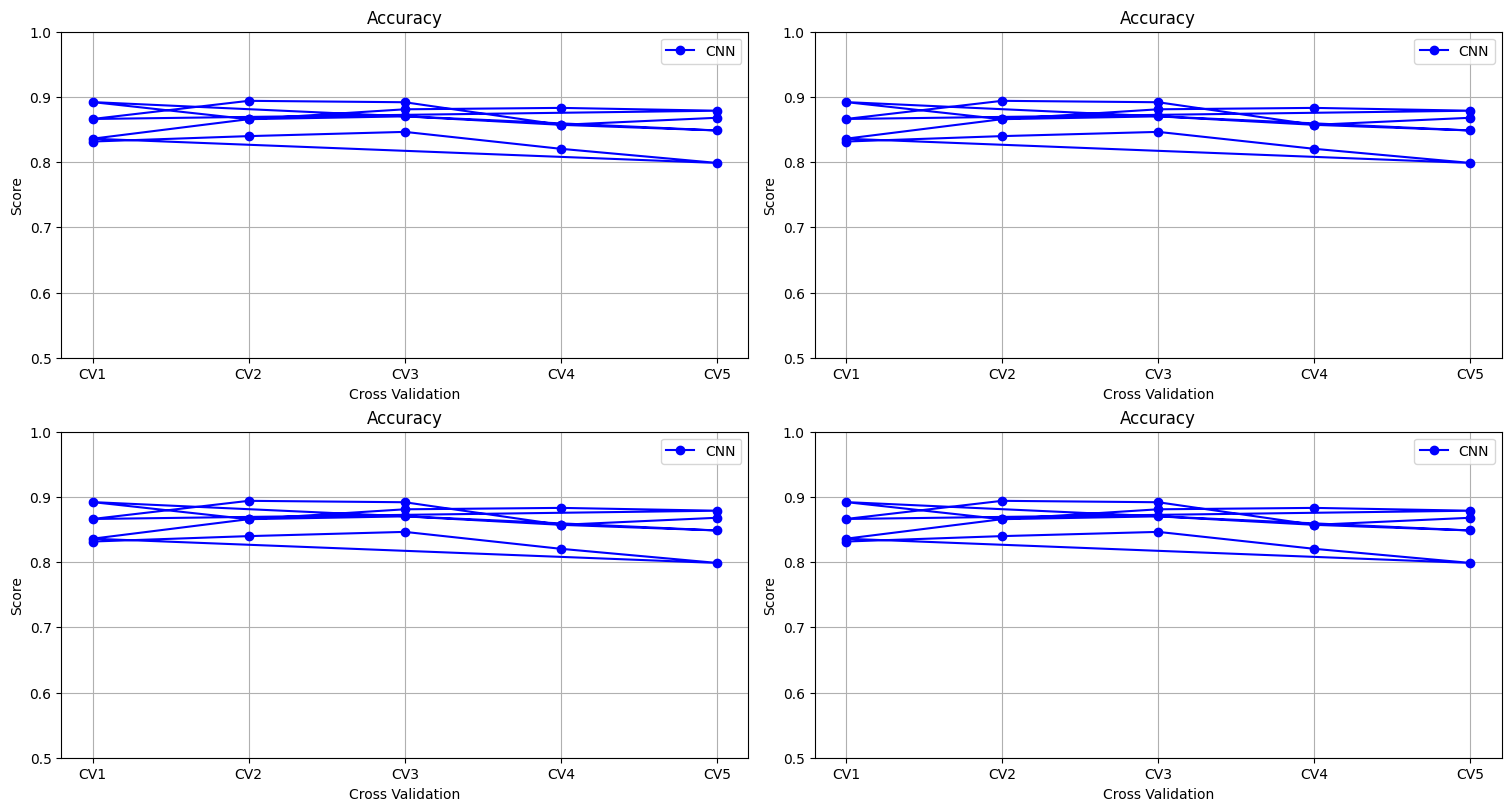

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5,1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[0,1].set_title('Accuracy')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5,1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,0].set_title('Accuracy')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5,1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = 'CNN')
axs[1,1].set_title('Accuracy')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5,1))
axs[1,1].grid()
axs[1,1].legend()



In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[108  34   0]
 [ 21 147   2]
 [  1   3 146]]


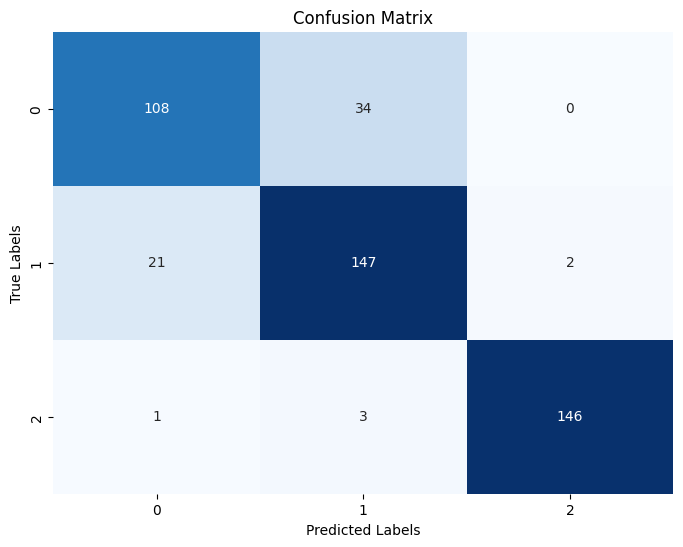

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

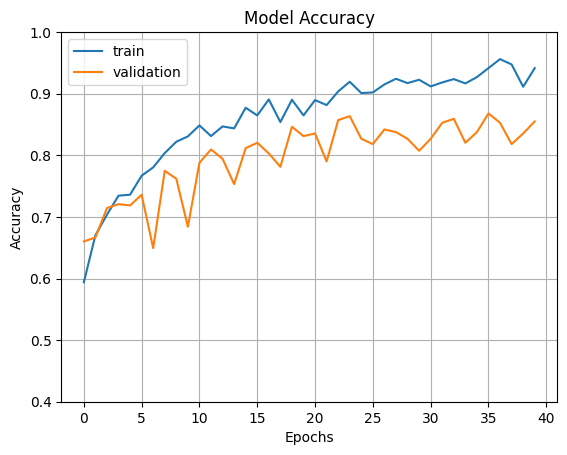

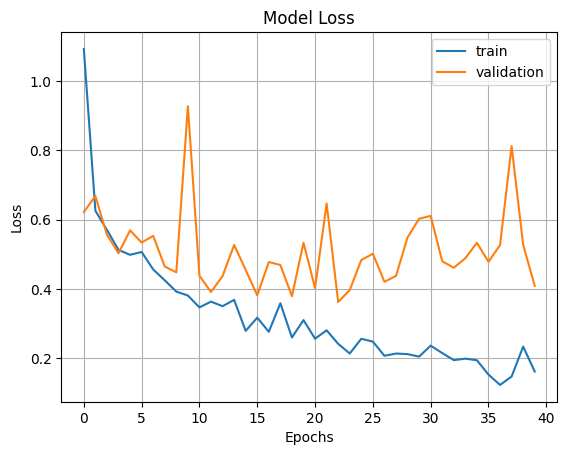

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
save_dir = '/saved_models/'
fold_var =  1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = True)

  valid_data_generator = test_datagen.flow_from_dataframe(validation_data,
                                                           directpru = image_dir,
                                                           x_col = "filename",
                                                           y_col = "label",
                                                           target_size =(128,128),
                                                           batch_size=16, class_mode="categorical",
                                                           shuffle = False)

  model = Sequential()

  resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
  for layer in resnet_model.layers:
    layer.trainable = False


  # model.add(ZeroPadding2D(padding=(3, 3)))
  model.add(resnet_model)

  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))

  # model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))

  model.add(Dense(3, activation='softmax'))
  model.summary

  model.compile(optimizer = Adam(learning_rate=0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy',
                               verbose = 1,
                               save_best_only = True, mode='max')

  callback_list = [checkpoint]
  hist = model.fit(train_data_generator,
                   epochs=50,
                   callbacks=callback_list,
                   validation_data = valid_data_generator)

  model.load_weights("/saved_models/model_"+str(fold_var)+".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  #get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  #karena output multilabel adalah nilai 0-1 dari tiap kelas maka diambil yang terbesar
  y_predict_labels = np.argmax(y_predict, axis = 1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average='weighted')
  rec = recall_score(y_predict_labels, y, average='weighted')
  f1score = f1_score(y_predict_labels, y, average='weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("Accuracy: ", results['accuracy'])
  print("recall: ", rec)
  print("precision: ", prec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1


Found 1848 validated image filenames belonging to 3 classes.
Found 463 validated image filenames belonging to 3 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/50
116/116 [==============================] - ETA: 0s - loss: 1.2792 - accuracy: 0.5974
Epoch 1: val_accuracy improved from -inf to 0.71058, saving model to /saved_models/model_1.h5
116/116 [==============================] - 428s 4s/step - loss: 1.2792 - accuracy: 0.5974 - val_loss: 0.5928 - val_accuracy: 0.7106
Epoch 2/50
116/116 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.7197
Epoch 2: val_accuracy improved from 0.71058 to 0.72138, saving model to /saved_models/model_1.h5
116/116 [==============================] - 171s 1s/step - loss: 0.5758 - accuracy: 0.7197 - val_loss: 0.5293 - val_accuracy: 0.7214
Epoch 3/50
116/116 [==============================] - ETA: 0s - loss: 0.5905 - accuracy: 0.7229
Epoch 3: val_accuracy did not improve from 0.72138
116/116 [===========

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-5d63076add41>", line 56, in <cell line: 5>
    hist = model.fit(train_data_generator,
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 52, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.UnknownError: Graph execution error:

OSError: [Errno 107] Transport endpoint is not connected: 'flora/flora (831).jpg'
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)

  File "/usr/local/lib/

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5,1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[0,1].set_title('Accuracy')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5,1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[1,0].set_title('Accuracy')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5,1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_ACCURACY, color='orange', marker='o', label = 'CNN')
axs[1,1].set_title('Accuracy')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5,1))
axs[1,1].grid()
axs[1,1].legend()



In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix


cm = confusion_matrix(y, y_predict_labels)
print("Confusion Matrix:")
print(cm)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-998dbfbc798f>", line 2, in <cell line: 2>
    import seaborn as sns
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceba

In [ ]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

print('\n')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()